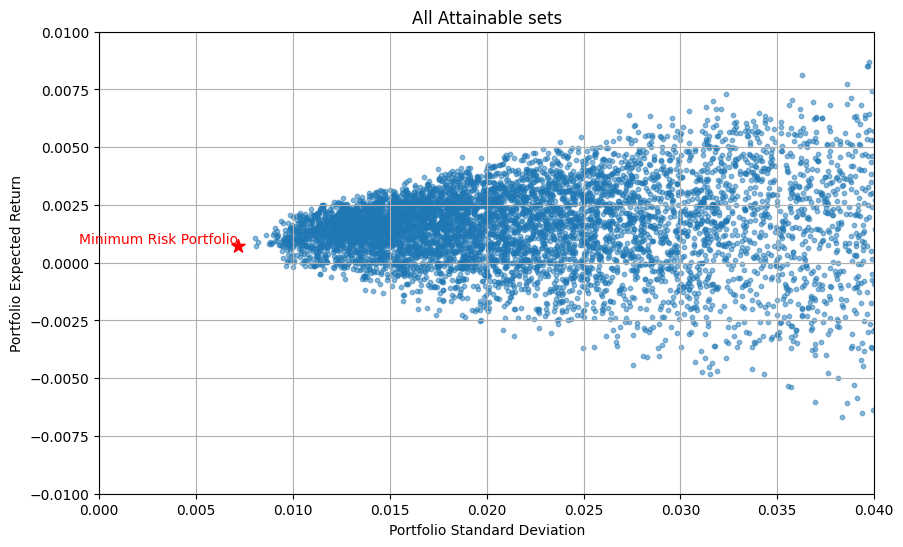

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given expected returns and covariance matrix
expected_returns = np.array([-0.0003437, 0.0046139, 0.0001420, 0.0014079, 0.0007750, 0.0002002, 0.0016758, 0.0040398, 0.0008958, 0.0028279])
covariance_matrix = np.array([
    [0.000583692, 0.000143347, -4.30815E-06, 7.30767E-05, 9.57634E-06, 4.21047E-05, 0.000140138, 5.97499E-05, 0.000127956, 0.000195692],
    [0.000143347, 0.000880969, 4.56573E-05, 0.000100371, 3.29553E-05, 3.22297E-05, 0.000106661, 7.41473E-05, 0.000100263, 0.000157344],
    [-4.30815E-06, 4.56573E-05, 0.000248774, 1.50473E-05, 2.32866E-05, 1.40351E-05, 1.60784E-06, 2.92806E-05, 3.39975E-05, 2.81786E-05],
    [7.30767E-05, 0.000100371, 1.50473E-05, 0.000178568, 4.60433E-05, 3.34315E-05, 0.000101875, 5.09047E-05, 5.52532E-05, 9.06195E-05],
    [9.57634E-06, 3.29553E-05, 2.32866E-05, 4.60433E-05, 9.84929E-05, 2.58921E-05, 1.37938E-05, 1.41603E-05, 3.46777E-05, 2.38277E-05],
    [4.21047E-05, 3.22297E-05, 1.40351E-05, 3.34315E-05, 2.58921E-05, 0.000116567, 2.51418E-05, 3.12305E-05, 4.19868E-05, 2.66971E-05],
    [0.000140138, 0.000106661, 1.60784E-06, 0.000101875, 1.37938E-05, 2.51418E-05, 0.000617673, 9.62163E-05, 6.86634E-05, 0.000259341],
    [5.97499E-05, 7.41473E-05, 2.92806E-05, 5.09047E-05, 1.41603E-05, 3.12305E-05, 9.62163E-05, 0.000510947, 8.98882E-05, 0.000136988],
    [0.000127956, 0.000100263, 3.39975E-05, 5.52532E-05, 3.46777E-05, 4.19868E-05, 6.86634E-05, 8.98882E-05, 0.000475924, 0.000131057],
    [0.000195692, 0.000157344, 2.81786E-05, 9.06195E-05, 2.38277E-05, 2.66971E-05, 0.000259341, 0.000136988, 0.000131057, 0.000969043]
])

# Define range of portfolio weights
num_assets = len(expected_returns)
num_portfolios = 10000
weights = np.random.randn(num_portfolios, num_assets)
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate portfolio returns
portfolio_returns = np.dot(weights, expected_returns)

# Calculate portfolio standard deviations
portfolio_std = []
for w in weights:
    portfolio_std.append(np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w))))

# Convert lists to NumPy arrays
portfolio_std = np.array(portfolio_std)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std, portfolio_returns, marker='o', s=10, alpha=0.5)
plt.title('All Attainable sets')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.xlim([0,0.04])
plt.ylim([-0.01,0.01])
plt.scatter(0.007190643, 0.000713692, color='red', marker='*', s=100, label='Your Point')
plt.text(0.007190643, 0.000713692, 'Minimum Risk Portfolio', fontsize=10, ha='right', va='bottom', color='red')
plt.grid(True)
plt.show()

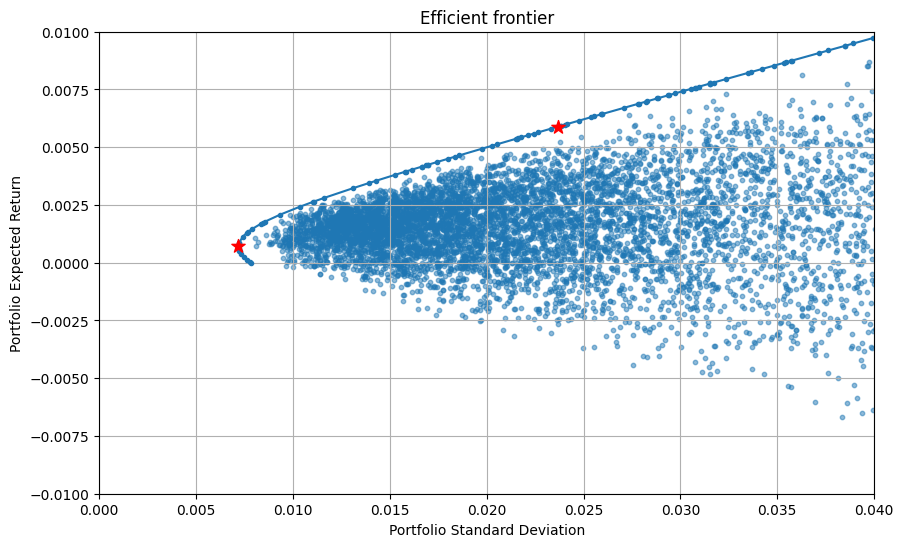

In [3]:
random_returns = np.random.uniform(0, 0.01, 100)
random_returns.sort()

# Calculate inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Generate a vector of ones with length equal to the number of random returns
ones_vector = np.ones(len(expected_returns))
ucinv = ones_vector @ inv_cov_matrix
ucinvut = ucinv @ ones_vector.T
mcinv = expected_returns @ inv_cov_matrix
mcinvmt = mcinv @ expected_returns.T
ucinvmt = ucinv @ expected_returns.T
mcinvut = mcinv @ ones_vector.T

std_dev = []
# Calculate weights for minimum variance portfolio
for x in random_returns:
    weights = (((mcinvmt - (x*ucinvmt))*ucinv) + (((ucinvut*x) - mcinvut)*mcinv)) / ((ucinvut*mcinvmt) - (ucinvmt*mcinvut))
    y = np.sqrt(weights.T.dot(covariance_matrix).dot(weights))
    std_dev.append(y)

point1 = (0, 0.0001878)
point2 = (0.023675802, 0.005888659)

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std, portfolio_returns, marker='o', s=10, alpha=0.5)
plt.plot(std_dev, random_returns, marker='o', linestyle='-', markersize=3)
plt.scatter(0.007190643, 0.000713692, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.scatter(0.023675802, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.title('Efficient frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.xlim([0,0.04])
plt.ylim([-0.01,0.01])

plt.grid(True)
plt.show()

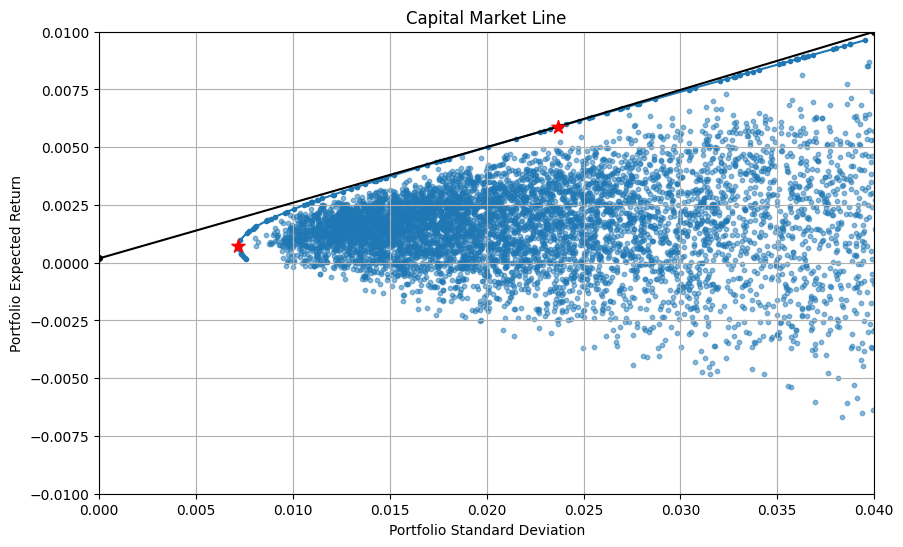

In [4]:
random_returns = np.random.uniform(0, 0.01, 100)
random_returns.sort()

# Calculate inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Generate a vector of ones with length equal to the number of random returns
ones_vector = np.ones(len(expected_returns))
ucinv = ones_vector @ inv_cov_matrix
ucinvut = ucinv @ ones_vector.T
mcinv = expected_returns @ inv_cov_matrix
mcinvmt = mcinv @ expected_returns.T
ucinvmt = ucinv @ expected_returns.T
mcinvut = mcinv @ ones_vector.T

std_dev = []
# Calculate weights for minimum variance portfolio
for x in random_returns:
    weights = (((mcinvmt - (x*ucinvmt))*ucinv) + (((ucinvut*x) - mcinvut)*mcinv)) / ((ucinvut*mcinvmt) - (ucinvmt*mcinvut))
    y = np.sqrt(weights.T.dot(covariance_matrix).dot(weights))
    std_dev.append(y)

point1 = (0, 0.0001878)
point2 = (0.023675802, 0.005888659)
x_val = [point1[0], point2[0], 0.04]
y_val = [point1[1], point2[1], 0.01]

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std, portfolio_returns, marker='o', s=10, alpha=0.5)
plt.plot(std_dev, random_returns, marker='o', linestyle='-', markersize=3)
plt.scatter(0.007190643, 0.000713692, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.scatter(0.023675802, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.plot(x_val, y_val, linestyle='-', marker='o', color='black', markersize=4)
#plt.text(1, 0.005888659, 'Market Portfolio', fontsize=10, ha='left', color='red')
plt.title('Capital Market Line')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.xlim([0,0.04])
plt.ylim([-0.01,0.01])
plt.grid(True)
plt.show()

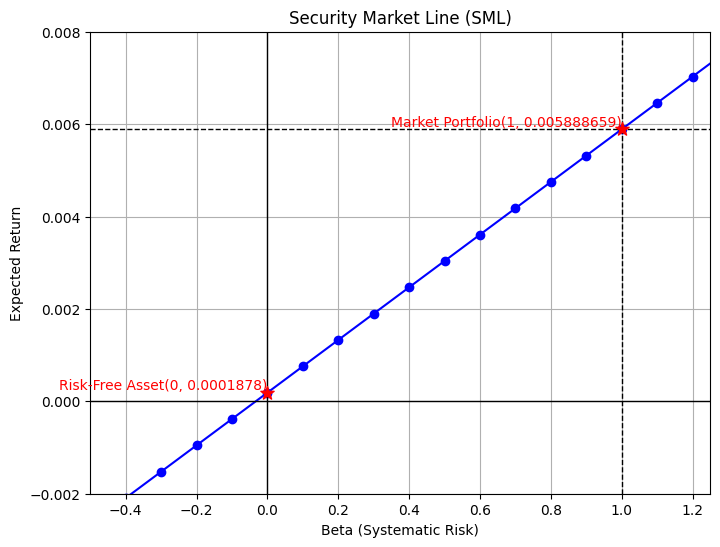

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Risk-free rate
R_f = 0.0001878

# Expected return of the market
E_R_m = 0.005888659

# Generate beta values from 0 to 2 with step size 0.1
betas = np.arange(-1, 2.1, 0.1)

# Calculate expected return for each beta using CAPM formula
expected_returns = R_f + betas * (E_R_m - R_f)

# Plot Security Market Line
plt.figure(figsize=(8, 6))
plt.plot(betas, expected_returns, marker='o', linestyle='-', color='b')
plt.scatter(1, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.xlim([-0.50,1.25])
plt.ylim([-0.002, 0.008])
plt.axhline(0, color='black', linewidth=1)  # Darken y=0 line
plt.axvline(0, color='black', linewidth=1)  # Darken x=0 line
plt.axhline(0.005888659, color='black', linewidth=1, linestyle='--')  # Darken y=0 line
plt.scatter(0, 0.0001878, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.axvline(1, color='black', linewidth=1, linestyle='--')  # Darken x=0 line
plt.title('Security Market Line (SML)')
plt.xlabel('Beta (Systematic Risk)')
plt.ylabel('Expected Return')
plt.grid(True)

# Add labels to the red points
plt.text(1, 0.005888659, 'Market Portfolio(1, 0.005888659)', fontsize=10, ha='right', va='bottom', color='red')
plt.text(0, 0.0001878, 'Risk-Free Asset(0, 0.0001878)', fontsize=10, ha='right', va='bottom', color='red')

plt.show()

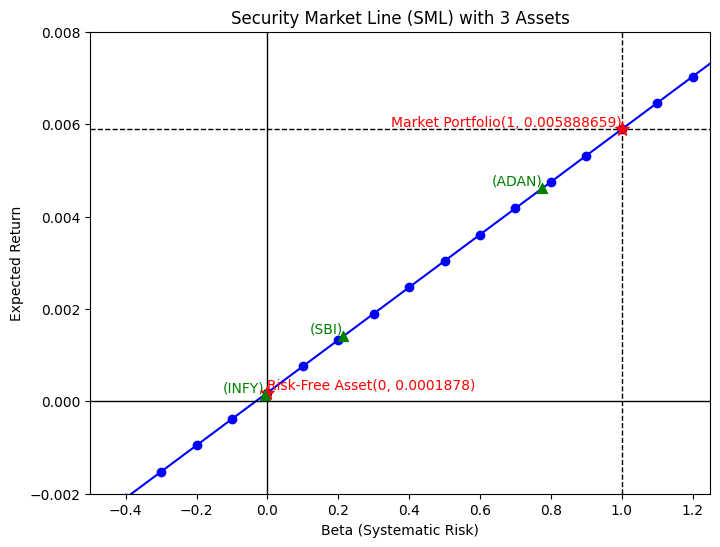

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Risk-free rate
R_f = 0.0001878

# Expected return of the market
E_R_m = 0.005888659

# Generate beta values from 0 to 2 with step size 0.1
betas = np.arange(-1, 2.1, 0.1)

# Calculate expected return for each beta using CAPM formula
expected_returns = R_f + betas * (E_R_m - R_f)

# Plot Security Market Line
plt.figure(figsize=(8, 6))
plt.plot(betas, expected_returns, marker='o', linestyle='-', color='b')
plt.scatter(1, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.xlim([-0.50,1.25])
plt.ylim([-0.002, 0.008])
plt.axhline(0, color='black', linewidth=1)  # Darken y=0 line
plt.axvline(0, color='black', linewidth=1)  # Darken x=0 line
plt.axhline(0.005888659, color='black', linewidth=1, linestyle='--')  # Darken y=0 line
plt.scatter(0, 0.0001878, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.axvline(1, color='black', linewidth=1, linestyle='--')  # Darken x=0 line
plt.title('Security Market Line (SML) with 3 Assets')
plt.xlabel('Beta (Systematic Risk)')
plt.ylabel('Expected Return')

# Add labels to the red points
plt.text(1, 0.005888659, 'Market Portfolio(1, 0.005888659)', fontsize=10, ha='right', va='bottom', color='red')
plt.text(0, 0.0001878, 'Risk-Free Asset(0, 0.0001878)', fontsize=10, ha='left', va='bottom', color='red')

# Additional points
additional_returns = [0.004613877, 0.000141976, 0.001407936]
additional_betas = [0.776386152, -0.008045285, 0.21402114]
additional_labels = ['ADAN', 'INFY', 'SBI']

plt.scatter(additional_betas, additional_returns, color='green', marker='^', label='Additional Points', zorder=10, s=50)
for label, x, y in zip(additional_labels, additional_betas, additional_returns):
    plt.text(x, y, f'({label})', fontsize=10, ha='right', va='bottom', color='green')

plt.show()

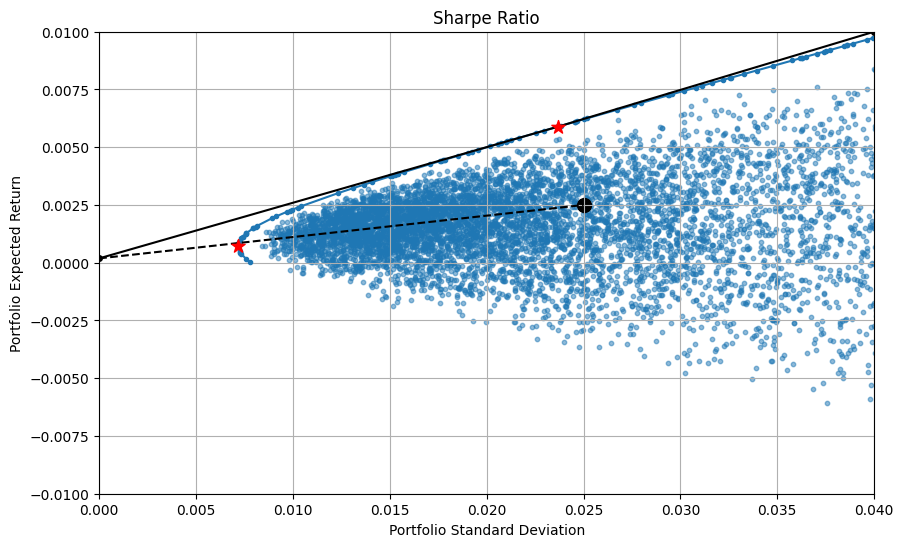

In [ ]:
random_returns = np.random.uniform(0, 0.01, 100)
random_returns.sort()
expected_returns = np.array([-0.0003437, 0.0046139, 0.0001420, 0.0014079, 0.0007750, 0.0002002, 0.0016758, 0.0040398, 0.0008958, 0.0028279])
covariance_matrix = np.array([
    [0.000583692, 0.000143347, -4.30815E-06, 7.30767E-05, 9.57634E-06, 4.21047E-05, 0.000140138, 5.97499E-05, 0.000127956, 0.000195692],
    [0.000143347, 0.000880969, 4.56573E-05, 0.000100371, 3.29553E-05, 3.22297E-05, 0.000106661, 7.41473E-05, 0.000100263, 0.000157344],
    [-4.30815E-06, 4.56573E-05, 0.000248774, 1.50473E-05, 2.32866E-05, 1.40351E-05, 1.60784E-06, 2.92806E-05, 3.39975E-05, 2.81786E-05],
    [7.30767E-05, 0.000100371, 1.50473E-05, 0.000178568, 4.60433E-05, 3.34315E-05, 0.000101875, 5.09047E-05, 5.52532E-05, 9.06195E-05],
    [9.57634E-06, 3.29553E-05, 2.32866E-05, 4.60433E-05, 9.84929E-05, 2.58921E-05, 1.37938E-05, 1.41603E-05, 3.46777E-05, 2.38277E-05],
    [4.21047E-05, 3.22297E-05, 1.40351E-05, 3.34315E-05, 2.58921E-05, 0.000116567, 2.51418E-05, 3.12305E-05, 4.19868E-05, 2.66971E-05],
    [0.000140138, 0.000106661, 1.60784E-06, 0.000101875, 1.37938E-05, 2.51418E-05, 0.000617673, 9.62163E-05, 6.86634E-05, 0.000259341],
    [5.97499E-05, 7.41473E-05, 2.92806E-05, 5.09047E-05, 1.41603E-05, 3.12305E-05, 9.62163E-05, 0.000510947, 8.98882E-05, 0.000136988],
    [0.000127956, 0.000100263, 3.39975E-05, 5.52532E-05, 3.46777E-05, 4.19868E-05, 6.86634E-05, 8.98882E-05, 0.000475924, 0.000131057],
    [0.000195692, 0.000157344, 2.81786E-05, 9.06195E-05, 2.38277E-05, 2.66971E-05, 0.000259341, 0.000136988, 0.000131057, 0.000969043]
])
# Calculate inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Generate a vector of ones with length equal to the number of random returns
ones_vector = np.ones(len(expected_returns))
ucinv = ones_vector @ inv_cov_matrix
ucinvut = ucinv @ ones_vector.T
mcinv = expected_returns @ inv_cov_matrix
mcinvmt = mcinv @ expected_returns.T
ucinvmt = ucinv @ expected_returns.T
mcinvut = mcinv @ ones_vector.T

std_dev = []
# Calculate weights for minimum variance portfolio
for x in random_returns:
    weights = (((mcinvmt - (x*ucinvmt))*ucinv) + (((ucinvut*x) - mcinvut)*mcinv)) / ((ucinvut*mcinvmt) - (ucinvmt*mcinvut))
    y = np.sqrt(weights.T.dot(covariance_matrix).dot(weights))
    std_dev.append(y)

point1 = (0, 0.0001878)
point2 = (0.023675802, 0.005888659)
x_val = [point1[0], point2[0], 0.04]
y_val = [point1[1], point2[1], 0.01]

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_std, portfolio_returns, marker='o', s=10, alpha=0.5)
plt.plot(std_dev, random_returns, marker='o', linestyle='-', markersize=3)
plt.scatter(0.007190643, 0.000713692, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.scatter(0.023675802, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.plot(x_val, y_val, linestyle='-', marker='o', color='black', markersize=4)
#plt.text(1, 0.005888659, 'Market Portfolio', fontsize=10, ha='left', color='red')
plt.scatter(0.025, 0.0025, color='black', marker='o', s=100, label='Additional Point')
plt.plot([0, 0.025], [0.0001878, 0.0025], linestyle='--', color='black', label='Line between points')
#plt.text(0.025, 0.0025, 'Random Security', fontsize=10, ha='left', color='red')
plt.title('Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.xlim([0,0.04])
plt.ylim([-0.01,0.01])
plt.grid(True)
plt.show()

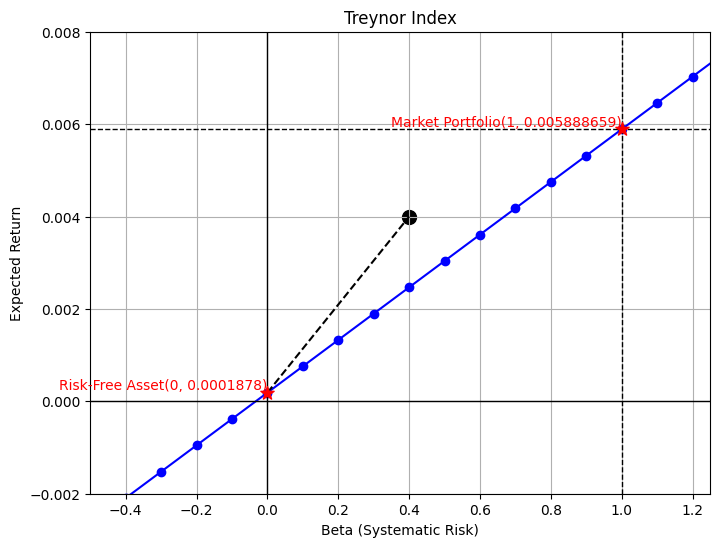

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Risk-free rate
R_f = 0.0001878

# Expected return of the market
E_R_m = 0.005888659

# Generate beta values from 0 to 2 with step size 0.1
betas = np.arange(-1, 2.1, 0.1)

# Calculate expected return for each beta using CAPM formula
expected_returns = R_f + betas * (E_R_m - R_f)

# Plot Security Market Line
plt.figure(figsize=(8, 6))
plt.plot(betas, expected_returns, marker='o', linestyle='-', color='b')
plt.scatter(1, 0.005888659, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.xlim([-0.50,1.25])
plt.ylim([-0.002, 0.008])
plt.axhline(0, color='black', linewidth=1)  # Darken y=0 line
plt.axvline(0, color='black', linewidth=1)  # Darken x=0 line
plt.axhline(0.005888659, color='black', linewidth=1, linestyle='--')  # Darken y=0 line
plt.scatter(0, 0.0001878, color='red', marker='*', s=100, label='Your Point', zorder=10)
plt.axvline(1, color='black', linewidth=1, linestyle='--')  # Darken x=0 line
plt.title('Treynor Index')
plt.xlabel('Beta (Systematic Risk)')
plt.scatter(0.4, 0.004, color='black', marker='o', s=100, label='Additional Point')
plt.plot([0, 0.4], [0.0001878, 0.004], linestyle='--', color='black', label='Line between points')
plt.ylabel('Expected Return')
plt.grid(True)

# Add labels to the red points
plt.text(1, 0.005888659, 'Market Portfolio(1, 0.005888659)', fontsize=10, ha='right', va='bottom', color='red')
plt.text(0, 0.0001878, 'Risk-Free Asset(0, 0.0001878)', fontsize=10, ha='right', va='bottom', color='red')

plt.show()